<a href="https://colab.research.google.com/github/dudubouneto/Disc_FluxoVacinacao/blob/main/PIB_Capita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Discretização baseada nos mapas do IBGE de PIB per capita municipal no estado de São Paulo <br> https://cidades.ibge.gov.br/brasil/sp/sao-jose-dos-campos/panorama

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Discretização das variáveis/Data/final_novo_ibge_sp - final_novo_ibge_sp_cpy.csv')

In [ ]:
data.head()

,Município,Codigo_IBGE,Gentílico,Prefeito,Área Territorial,População Estimada,Densidade Demográfica,Escolarização 6 a 14 anos,IDHM,Mortalidade Infantil,Receitas Realizadas,Despesas empenhadas,PIB per capita,Latitude,Longitude,Postos vacinação,Hospitais,Médicos
0,ADAMANTINA,3500105,adamantinense,MARCIO CARDIM,412,35111,"82,15","97,6",790,"11,63","16,071,867,925","13,708,366,993","30962,66",-22,-511,4,0,0
1,ADOLFO,3500204,adolfino,IZAEL ANTONIO FERNANDES,211,3554,"16,85","98,6",730,"19,23","2,733,374,731","2,010,387,713","25867,75",-212,-496,1,0,0
2,AGUAÍ,3500303,aguaiano,JOSÉ ALEXANDRE PEREIRA DE ARAÚJO,475,36648,"67,72","95,8",715,"16,06","8,409,476,006","7,216,873,408","28041,03",-221,-470,5,0,0
3,ÁGUAS DA PRATA,3500402,pratense,REGINA HELENA JANIZELO MORAES,143,8221,"53,05","98,8",781,"25,32","2,939,024,814","2,436,340,149","20683,88",-219,-467,1,0,0
4,ÁGUAS DE LINDÓIA,3500501,lindoiense,GILBERTO ABDOU HELOU,60,18808,"287,16","96,2",745,"8,37","8,694,922,213","7,520,147,793","26427,34",-225,-466,4,0,0


In [ ]:
data = data[['Município', 'PIB per capita']]
data.head()

,Município,PIB per capita
0,ADAMANTINA,"30962,66"
1,ADOLFO,"25867,75"
2,AGUAÍ,"28041,03"
3,ÁGUAS DA PRATA,"20683,88"
4,ÁGUAS DE LINDÓIA,"26427,34"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Município       645 non-null    object
 1   PIB per capita  645 non-null    object
dtypes: object(2)
memory usage: 10.2+ KB


In [ ]:
# convertendo o PIB per capita para float
def to_float(x):
  num = x.replace(",", "")
  num = float(num)/100
  return num

data['PIB per capita'] = data['PIB per capita'].apply(to_float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Município       645 non-null    object 
 1   PIB per capita  645 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


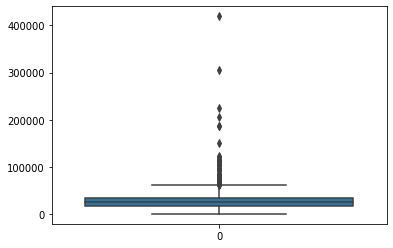

In [ ]:
sns.boxplot(data=data['PIB per capita'])

In [ ]:
bins = [0, 19449.94, 25467.09, 37107.07, data['PIB per capita'].max()]
labels = ['até 19449.94', '19449.95 a 25467.09', '25467.10 a 37107.07', 'maior que 37107.07']
data['Classificacao PIB'] = pd.cut(data['PIB per capita'], bins=bins, labels=labels)
data.head()

,Município,PIB per capita,Classificacao PIB
0,ADAMANTINA,30962.66,25467.10 a 37107.07
1,ADOLFO,25867.75,25467.10 a 37107.07
2,AGUAÍ,28041.03,25467.10 a 37107.07
3,ÁGUAS DA PRATA,20683.88,19449.95 a 25467.09
4,ÁGUAS DE LINDÓIA,26427.34,25467.10 a 37107.07


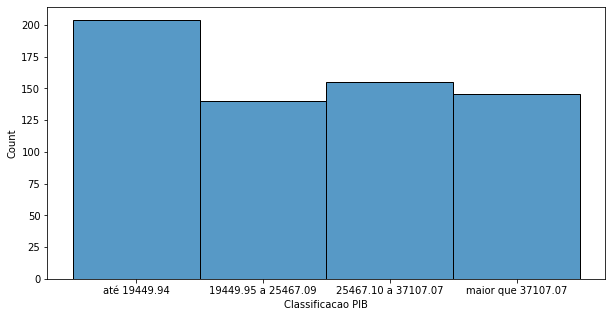

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Classificacao PIB'])